# Hyperparameter Optimization

For this exercise, we will have a look at Hyperparameter Optimization --
instead of just choosing the best type of machine learning model, we also want
to choose the best hyperparameter setting for a task. The end result (i.e. the
predictive performance) is again not important; how you get there is.

Your deliverable will be a report, written in a style that it
would be suitable for inclusion in an academic paper as the "Experimental
Setup" section or similar. If unsure, check an academic paper of your choice,
for example [this one](https://www.eecs.uwyo.edu/~larsko/papers/pulatov_opening_2022-1.pdf). The
level of detail should be higher than in a typical academic paper though. Your
report should be at most five pages, including references and figures but
excluding appendices. It should have the following structure:
- Introduction: What problem are you solving, how are you going to solve it.
- Dataset Description: Describe the data you're using, e.g. how many features and observations, what are you predicting, any missing values, etc.
- Experimental Setup: What specifically are you doing to solve the problem, i.e.\ what programming languages and libraries, how are you processing the data, what machine learning algorithms are you considering and what hyperparameters and value ranges, what measures you are using to evaluate them, what hyperparameter optimization method you chose, etc.
- Results: Description of what you observed, including plots. Compare
  performance before and after tuning, and show the best configuration.
- Code: Add the code you've used as a separate file.

Your report must contain enough detail to reproduce what you did without the
code. If in doubt, include more detail.

There is no required format for the report. You could, for example, use an
iPython notebook.

## Data and Setup

We will have a look at the [Wine Quality
dataset](https://archive-beta.ics.uci.edu/dataset/186/wine+quality). Choose the
one that corresponds to your preference in wine. You may also use a dataset of
your choice, for example one that's relevant to your research.

Choose a small number of different machine learning algorithms and
hyperparameters, along with value ranges, for each. You can use implementations
of AutoML systems (e.g. auto-sklearn), scientific papers, or the documentation
of the library you are using to determine the hyperparameters to tune and the
value ranges. Note that there is not only a single way to do this, but define a
reasonable space (e.g. don't include whether to turn on debug output, or random
forests with 1,000,000 trees, or tune the loss function). Your hyperparameter
search space should be so large that you cannot simply run a grid search.

Determine the best machine learning algorithm and hyperparameter setting for
your dataset. Make sure to optimize both the type of machine learning algorithm
and the hyperparameters at the same time (do not first choose the best ML
algorithm and then optimize its hyperparameters). Choose a suitable
hyperparameter optimizer; you could also use several and e.g. compare the
results achieved by random search and Bayesian optimization. Make sure that the
way you evaluate model performance avoids bias and overfitting. You could use
statistical tests to make this determination.

## Submission

Add your report and code to this repository. Bonus points if you can set up a
Github action to automatically run the code and generate the report!

## Useful Resources :
- "*Basics of HPO - Example and Practical Hints*" -From the AutoML Course Videos
- https://www.youtube.com/watch?v=Gol_qOgRqfA
- https://www.youtube.com/watch?v=0wUF_Ov8b0A&t=1058s

## Importing the Dataset as a Pandas Dataframe

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
red_wine_df = pd.read_csv('winequality-red.csv', delimiter=';')

In [ ]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X = red_wine_df.iloc[:, :-1]
y = red_wine_df['quality']

X.shape, y.shape

((1599, 11), (1599,))

## Importing our Models

Continuing on from the "ML Algorithm Selection" exercise, we will use the same models to figure out the best model, for the red wine quality dataset, out of the following models :
- Logistic Regression
- K-Nearest Neighbors
- Random Forest
- Support Vector Classifier (SVM Classifier)
- Decision Tree Classifier

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

In [ ]:
random_forest_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Hyperparameter Optimization

Methods Used :
- Random Search
- Bayesian Optimization

### Bayesian Optimization

In [ ]:
# Comment out this line to install the necessary library for Bayesian Optimization:
!pip install baytune

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.2/75.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 5.2 MB/s eta 0:00:00


In [ ]:
models = {
    'RF' : RandomForestClassifier
}

In [ ]:
from baytune.tuning import Tunable
from baytune.tuning import hyperparams as hp

tunables = {
    'RF': Tunable({
        'n_estimators' : hp.IntHyperParam(min=50, max=1000, default=100),
        'criterion' : hp.CategoricalHyperParam(['gini', 'entropy', 'log_loss'], default='gini'),
        'max_depth': hp.IntHyperParam(min=1, max=100, default=5),
        'min_samples_split': hp.IntHyperParam(min=2, max=100, default=2),
        'min_samples_leaf': hp.IntHyperParam(min=1, max=100, default=1),
        'min_weight_fraction_leaf': hp.FloatHyperParam(min=0.0, max=0.5, default=0.0),
        'max_features': hp.CategoricalHyperParam(["sqrt", "log2", None], default='sqrt'),
    })
}

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from baytune import BTBSession

inner_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=90)
outer_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=90)
best_configurations = []
best_scores = []

for train_index, test_index in outer_fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    def scoring_function(model_name, hyperparameter_values):
        model_class = models[model_name]
        model_instance = model_class(**hyperparameter_values)
        scores = cross_val_score(
            cv=inner_fold,
            estimator=model_instance,
            X=X_train,
            y=y_train,
            scoring='accuracy',
        )

        return scores.mean()

    session = BTBSession(
        tunables=tunables,
        scorer=scoring_function,
        verbose=True,
    )

    best_result = session.run(30)

    best_model_name = best_result['name']
    hyperparameters = best_result['config']
    best_model_class = models[best_model_name]
    model_instance = best_model_class(**hyperparameters)

    model_instance.fit(X_train, y_train)

    score = model_instance.score(X_test, y_test)

    best_scores.append(score)
    best_configurations.append({
        "hyper-parameters" : hyperparameters,
        "performance_estimate" : score
    })

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
for configuration in best_configurations:
  print(configuration)
  print("****************************************************")
  print("****************************************************")

{'hyper-parameters': {'n_estimators': 538, 'criterion': 'gini', 'max_depth': 21, 'min_samples_split': 12, 'min_samples_leaf': 8, 'min_weight_fraction_leaf': 0.01550215013681494, 'max_features': 'sqrt'}, 'performance_estimate': 0.6125}
****************************************************
****************************************************
{'hyper-parameters': {'n_estimators': 138, 'criterion': 'gini', 'max_depth': 29, 'min_samples_split': 36, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.003344935634825408, 'max_features': 'sqrt'}, 'performance_estimate': 0.675}
****************************************************
****************************************************
{'hyper-parameters': {'n_estimators': 118, 'criterion': 'gini', 'max_depth': 97, 'min_samples_split': 28, 'min_samples_leaf': 15, 'min_weight_fraction_leaf': 0.016829390357937124, 'max_features': 'sqrt'}, 'performance_estimate': 0.64375}
****************************************************
***************************

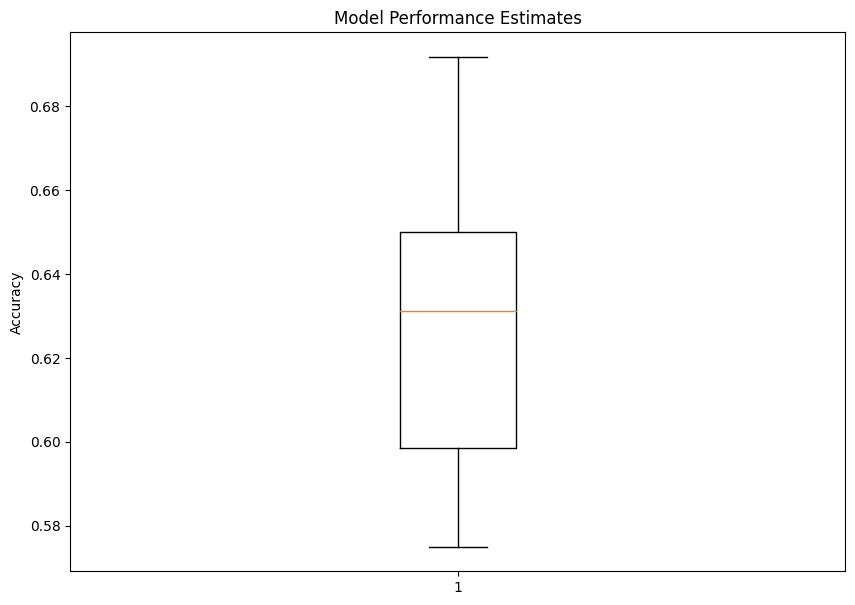

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))

plt.boxplot(best_scores)

plt.title("Model Performance Estimates")

plt.ylabel("Accuracy")

plt.show()

In [ ]:
np.array(best_scores).mean()

0.629807389937107

### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#### Random Forest

In [ ]:
from scipy.stats import uniform

# Define the hyperparameters:

n_estimators = range(50, 1000)
criterion = ['gini', 'entropy', 'log_loss']
max_depth = range(1, 100)
min_samples_split = range(2, 100)
min_samples_leaf = range(1, 100)
min_weight_fraction_leaf = uniform(scale=0.5)
max_features = ["sqrt", "log2", None]

In [ ]:
# Construct the hyperparameter distribution:

hyperparameter_distribution = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_depth" : max_depth,
    "min_samples_split" : min_samples_split,
    "min_samples_leaf" : min_samples_leaf,
    "min_weight_fraction_leaf" : min_weight_fraction_leaf,
    "max_features" : max_features,
}

In [ ]:
from sklearn.model_selection import StratifiedKFold

inner_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=90)
outer_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=90)

ITERATIONS = 50
random_search = RandomizedSearchCV(
    random_forest_classifier,
    hyperparameter_distribution,
    cv=inner_fold,
    scoring='accuracy',
    n_iter=ITERATIONS,
    verbose=4
)

best_configurations = []
best_scores = []

for train_index, test_index in outer_fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    random_search.fit(X_train, y_train)

    score = random_search.score(X_test, y_test)

    best_scores.append(score)
    best_configurations.append({
        "hyper-parameters" : random_search.best_params_,
        "performance_estimate" : score
    })

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END criterion=log_loss, max_depth=52, max_features=log2, min_samples_leaf=25, min_samples_split=43, min_weight_fraction_leaf=0.4451355395616356, n_estimators=105;, score=0.559 total time=   0.3s
[CV 2/5] END criterion=log_loss, max_depth=52, max_features=log2, min_samples_leaf=25, min_samples_split=43, min_weight_fraction_leaf=0.4451355395616356, n_estimators=105;, score=0.583 total time=   0.2s
[CV 3/5] END criterion=log_loss, max_depth=52, max_features=log2, min_samples_leaf=25, min_samples_split=43, min_weight_fraction_leaf=0.4451355395616356, n_estimators=105;, score=0.562 total time=   0.3s
[CV 4/5] END criterion=log_loss, max_depth=52, max_features=log2, min_samples_leaf=25, min_samples_split=43, min_weight_fraction_leaf=0.4451355395616356, n_estimators=105;, score=0.545 total time=   0.3s
[CV 5/5] END criterion=log_loss, max_depth=52, max_features=log2, min_samples_leaf=25, min_samples_split=43, min_weight_fr

In [ ]:
best_configurations

[{'hyper-parameters': {'criterion': 'gini',
   'max_depth': 15,
   'max_features': None,
   'min_samples_leaf': 21,
   'min_samples_split': 53,
   'min_weight_fraction_leaf': 0.007467177973771055,
   'n_estimators': 990},
  'performance_estimate': 0.56875},
 {'hyper-parameters': {'criterion': 'gini',
   'max_depth': 67,
   'max_features': 'log2',
   'min_samples_leaf': 25,
   'min_samples_split': 32,
   'min_weight_fraction_leaf': 0.046399350042537646,
   'n_estimators': 398},
  'performance_estimate': 0.675},
 {'hyper-parameters': {'criterion': 'entropy',
   'max_depth': 31,
   'max_features': 'sqrt',
   'min_samples_leaf': 21,
   'min_samples_split': 19,
   'min_weight_fraction_leaf': 0.03602627819896431,
   'n_estimators': 332},
  'performance_estimate': 0.625},
 {'hyper-parameters': {'criterion': 'log_loss',
   'max_depth': 19,
   'max_features': 'log2',
   'min_samples_leaf': 5,
   'min_samples_split': 63,
   'min_weight_fraction_leaf': 0.013685318608450292,
   'n_estimators': 380

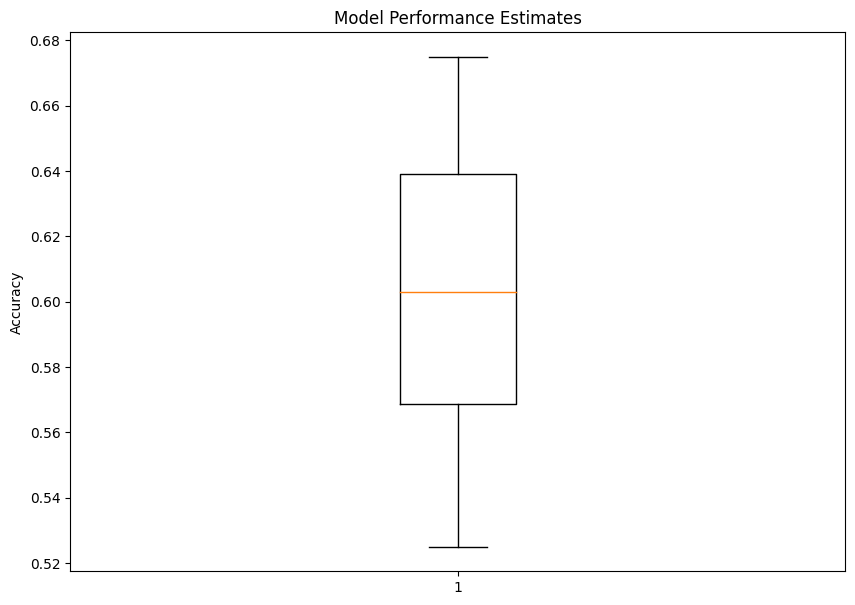

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))

plt.boxplot(best_scores)

plt.title("Model Performance Estimates")

plt.ylabel("Accuracy")

plt.show()

In [ ]:
np.array(best_scores).mean()

0.6029088050314465